### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Data Collection

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Preprocessing

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [6]:
data.shape

(614, 13)

In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
data.shape

(480, 13)

In [11]:
# we can do label encoding simply like this as well
data.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)

In [12]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [13]:
data.drop('Loan_ID',axis = 1,inplace = True)

In [14]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [15]:
X = data.drop('Loan_Status',axis = 1)
y = data.Loan_Status

In [16]:
X.shape

(480, 11)

In [17]:
y.shape

(480,)

In [18]:
X.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban


<Axes: xlabel='Gender', ylabel='count'>

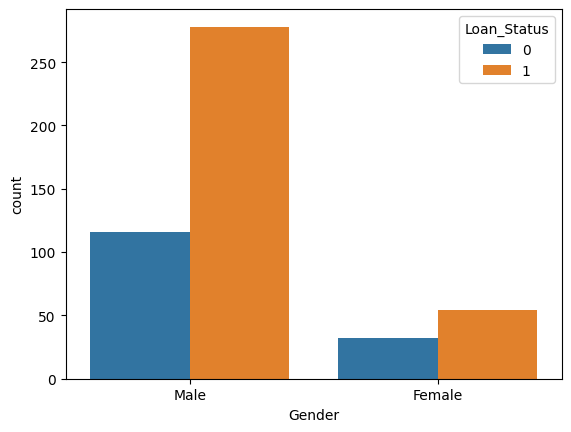

In [19]:
sns.countplot(x = 'Gender',hue = 'Loan_Status',data = data)

<Axes: xlabel='Married', ylabel='count'>

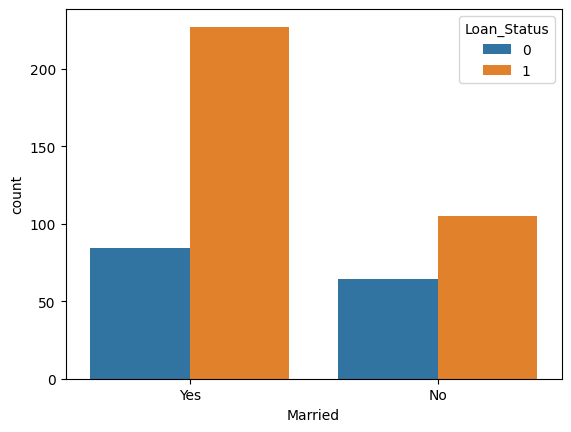

In [20]:
sns.countplot(x = 'Married',hue = 'Loan_Status',data = data)

<Axes: xlabel='Dependents', ylabel='count'>

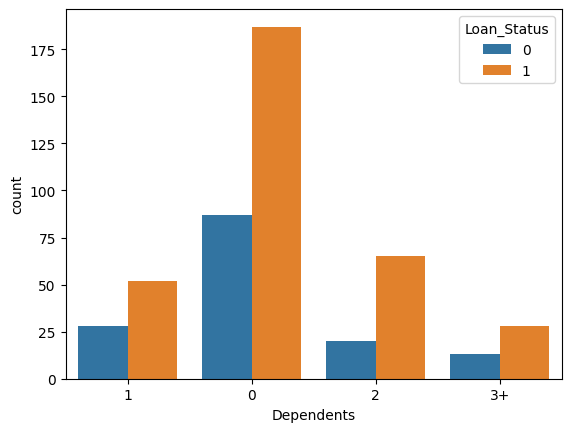

In [21]:
sns.countplot(x = 'Dependents',hue = 'Loan_Status',data = data)

<Axes: xlabel='Education', ylabel='count'>

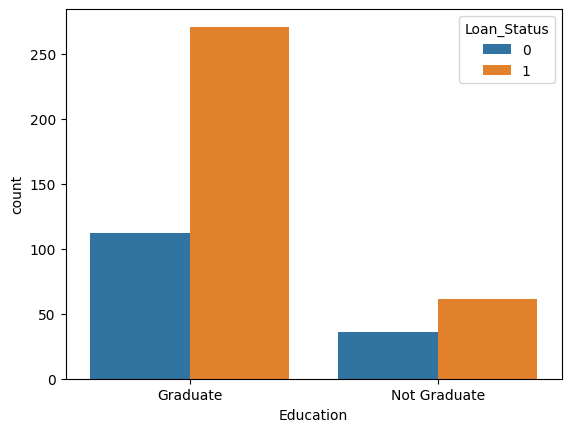

In [22]:
sns.countplot(x = 'Education',hue = 'Loan_Status',data = data)

<Axes: xlabel='Self_Employed', ylabel='count'>

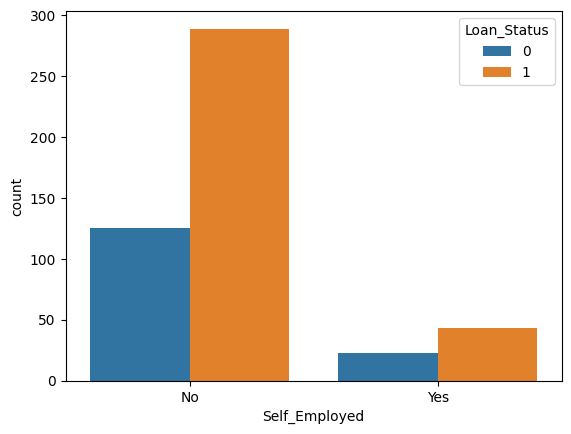

In [23]:
sns.countplot(x = 'Self_Employed',hue = 'Loan_Status',data = data)

<Axes: xlabel='Credit_History', ylabel='count'>

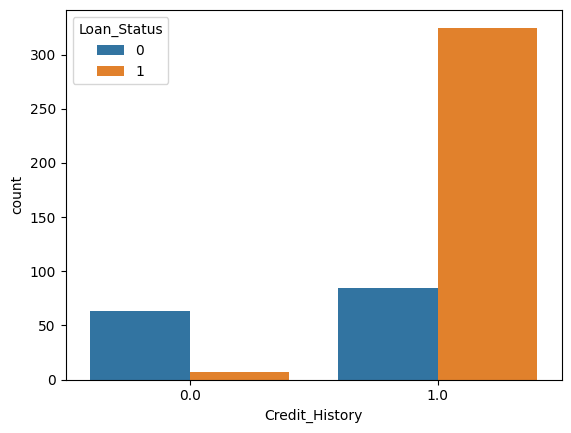

In [24]:
sns.countplot(x = 'Credit_History',hue = 'Loan_Status',data = data)

<Axes: xlabel='Property_Area', ylabel='count'>

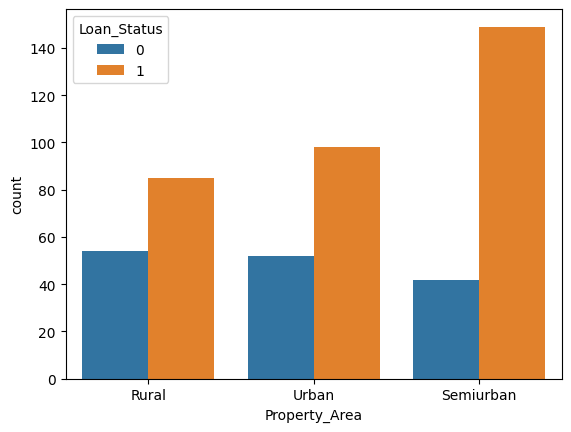

In [25]:
sns.countplot(x = 'Property_Area',hue = 'Loan_Status',data = data)

In [26]:
X = pd.get_dummies(X,drop_first = True) # considering dummy variable trap as well

In [27]:
X.shape

(480, 14)

In [28]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True
5,5417,4196.0,267.0,360.0,1.0,True,True,False,True,False,False,True,False,True


In [29]:
X = X.astype('float')

In [30]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583.0,1508.0,128.0,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3000.0,0.0,66.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,6000.0,0.0,141.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,5417.0,4196.0,267.0,360.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [31]:
scaler = MinMaxScaler()

In [32]:
scaled_data = scaler.fit_transform(X)

In [33]:
scaled_data[0]

array([0.05482993, 0.0445666 , 0.20135364, 0.72972973, 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [34]:
# 1 -> Eligible
# 0 -> Not_Eligible

### Train_Test_Splits

In [35]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data, y, test_size = 0.2, stratify = y)

In [36]:
x_train.shape

(384, 14)

In [37]:
y_train.shape

(384,)

In [38]:
x_test.shape

(96, 14)

In [39]:
y_test.shape

(96,)

### Models Training with GridSearchCV

In [40]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def gridsearchcv(X, y):
    algos = {
        'naive_bayes': {
            'model': GaussianNB(),
            'params': {
               'priors' : [None]
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'min_samples_split': [40]
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion' : ['gini']
            }
        },
        'logistic_regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'solver': ['liblinear', 'saga'],
                'penalty': ['l1', 'l2']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gscv = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gscv.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gscv.best_score_,
            'best_params': gscv.best_params_
        })
        best_estimator = gscv.best_estimator_
        pickle.dump(best_estimator, open(f'{algo_name}_model.p', 'wb'))

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [41]:
stats = gridsearchcv(x_train,y_train)

In [42]:
stats.to_csv('stats.csv')

In [43]:
stats

,model,best_score,best_params
0,naive_bayes,0.781818,{'priors': None}
1,decision_tree,0.768831,{'min_samples_split': 40}
2,random_forest,0.800000,{'criterion': 'gini'}
3,logistic_regression,0.823377,"{'penalty': 'l1', 'solver': 'saga'}"


### Models Evaluation

#### Decision Trees Model Evaluation

In [44]:
with open('decision_tree_model.p', 'rb') as file:
    model1 = pickle.load(file)

In [45]:
model1.score(x_train,y_train)

0.859375

In [46]:
model1.score(x_test,y_test)

0.7395833333333334

Text(58.222222222222214, 0.5, 'Truth')

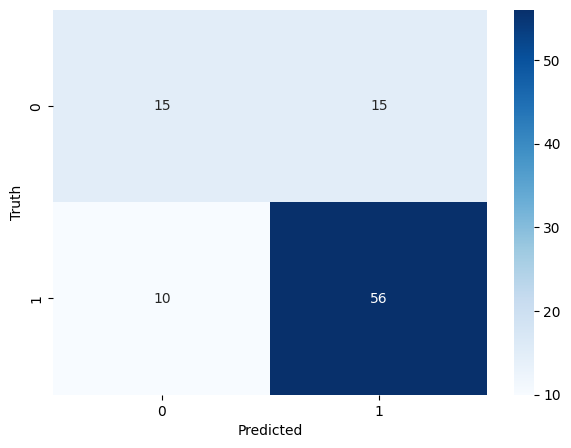

In [47]:
cm = confusion_matrix(y_test, model1.predict(x_test))
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Random Forest Model Evaluation

In [48]:
with open('random_forest_model.p', 'rb') as file:
    model2 = pickle.load(file)

In [49]:
model2.score(x_train,y_train)

1.0

In [50]:
model2.score(x_test,y_test)

0.7916666666666666

Text(58.222222222222214, 0.5, 'Truth')

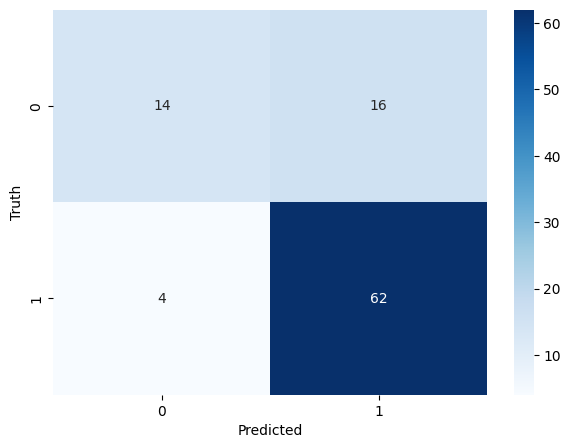

In [51]:
cm = confusion_matrix(y_test, model2.predict(x_test))
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Naive Bayes Model Evaluation

In [52]:
with open('naive_bayes_model.p', 'rb') as file:
    model3 = pickle.load(file)

In [53]:
model3.score(x_train,y_train)

0.8020833333333334

In [54]:
model3.score(x_test,y_test)

0.8229166666666666

Text(58.222222222222214, 0.5, 'Truth')

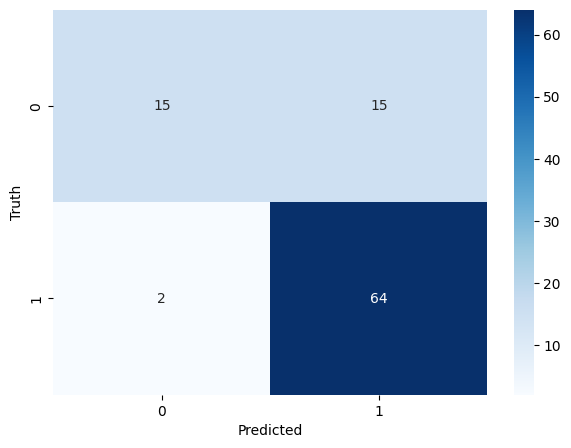

In [55]:
cm = confusion_matrix(y_test, model3.predict(x_test))
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Logistic Regression Model Evaluation

In [56]:
with open('logistic_regression_model.p', 'rb') as file:
    model4 = pickle.load(file)

In [57]:
model4.score(x_train,y_train)

0.8046875

In [58]:
model4.score(x_test,y_test)

0.8229166666666666

Text(58.222222222222214, 0.5, 'Truth')

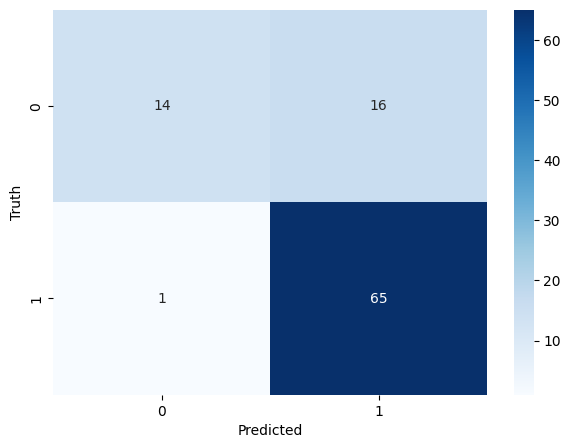

In [59]:
cm = confusion_matrix(y_test, model4.predict(x_test))
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')